<a href="https://colab.research.google.com/github/ADVAIT135/CDAC/blob/main/3.%20AI%20TRENDS/ASSIGNMENT%205/CDAC_PGDAI_AI_TRENDS_ASSIGNMENT_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u> Name :</u> ADVAIT GURUNATH CHAVAN
# <u> Email ID: </u> advaitchavan135@gmail.com
# CDAC_PGDAI_AI_TRENDS_ASSIGNMENT_5

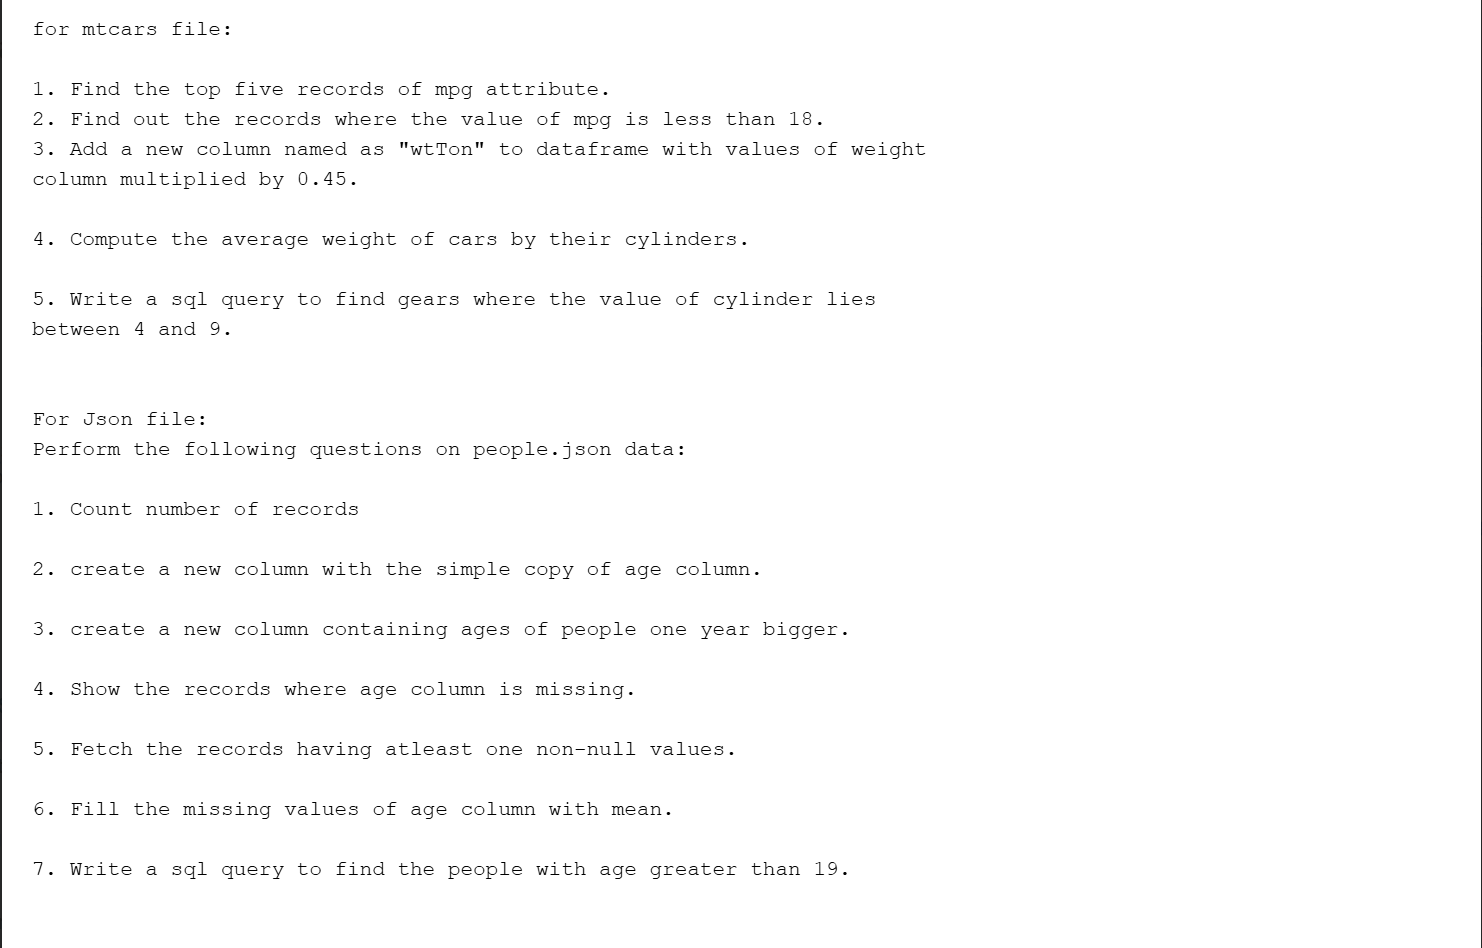

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

In [2]:
spark = SparkSession.builder.appName("MTCars_People_Tasks").getOrCreate()

## 1. For MT cars file

### A. Find the top five records of the mpg attribute.

In [3]:
mtcars = spark.read.option("header", True).option("inferSchema", True).csv("/content/mtcars.csv")

In [5]:
mtcars.show()

+-------------------+----+---+-----+---+----+-----+-----+---+---+----+----+
|              model| mpg|cyl| disp| hp|drat|   wt| qsec| vs| am|gear|carb|
+-------------------+----+---+-----+---+----+-----+-----+---+---+----+----+
|          Mazda RX4|21.0|  6|160.0|110| 3.9| 2.62|16.46|  0|  1|   4|   4|
|      Mazda RX4 Wag|21.0|  6|160.0|110| 3.9|2.875|17.02|  0|  1|   4|   4|
|         Datsun 710|22.8|  4|108.0| 93|3.85| 2.32|18.61|  1|  1|   4|   1|
|     Hornet 4 Drive|21.4|  6|258.0|110|3.08|3.215|19.44|  1|  0|   3|   1|
|  Hornet Sportabout|18.7|  8|360.0|175|3.15| 3.44|17.02|  0|  0|   3|   2|
|            Valiant|18.1|  6|225.0|105|2.76| 3.46|20.22|  1|  0|   3|   1|
|         Duster 360|14.3|  8|360.0|245|3.21| 3.57|15.84|  0|  0|   3|   4|
|          Merc 240D|24.4|  4|146.7| 62|3.69| 3.19| 20.0|  1|  0|   4|   2|
|           Merc 230|22.8|  4|140.8| 95|3.92| 3.15| 22.9|  1|  0|   4|   2|
|           Merc 280|19.2|  6|167.6|123|3.92| 3.44| 18.3|  1|  0|   4|   4|
|          M

In [4]:
mtcars.orderBy(F.desc("mpg")).select("mpg").show(5)

+----+
| mpg|
+----+
|33.9|
|32.4|
|30.4|
|30.4|
|27.3|
+----+
only showing top 5 rows



### B. Find out the records where the value of mpg is less than 18.

In [6]:
mtcars.filter(F.col("mpg") < 18).show()

+-------------------+----+---+-----+---+----+-----+-----+---+---+----+----+
|              model| mpg|cyl| disp| hp|drat|   wt| qsec| vs| am|gear|carb|
+-------------------+----+---+-----+---+----+-----+-----+---+---+----+----+
|         Duster 360|14.3|  8|360.0|245|3.21| 3.57|15.84|  0|  0|   3|   4|
|          Merc 280C|17.8|  6|167.6|123|3.92| 3.44| 18.9|  1|  0|   4|   4|
|         Merc 450SE|16.4|  8|275.8|180|3.07| 4.07| 17.4|  0|  0|   3|   3|
|         Merc 450SL|17.3|  8|275.8|180|3.07| 3.73| 17.6|  0|  0|   3|   3|
|        Merc 450SLC|15.2|  8|275.8|180|3.07| 3.78| 18.0|  0|  0|   3|   3|
| Cadillac Fleetwood|10.4|  8|472.0|205|2.93| 5.25|17.98|  0|  0|   3|   4|
|Lincoln Continental|10.4|  8|460.0|215| 3.0|5.424|17.82|  0|  0|   3|   4|
|  Chrysler Imperial|14.7|  8|440.0|230|3.23|5.345|17.42|  0|  0|   3|   4|
|   Dodge Challenger|15.5|  8|318.0|150|2.76| 3.52|16.87|  0|  0|   3|   2|
|        AMC Javelin|15.2|  8|304.0|150|3.15|3.435| 17.3|  0|  0|   3|   2|
|         Ca

### C. Add a new column named "wtTon" to the DataFrame with values of the weight column multiplied by 0.45.

In [7]:
mtcars_with_wtTon = mtcars.withColumn("wtTon", F.col("wt") * 0.45)
mtcars_with_wtTon.show()

+-------------------+----+---+-----+---+----+-----+-----+---+---+----+----+------------------+
|              model| mpg|cyl| disp| hp|drat|   wt| qsec| vs| am|gear|carb|             wtTon|
+-------------------+----+---+-----+---+----+-----+-----+---+---+----+----+------------------+
|          Mazda RX4|21.0|  6|160.0|110| 3.9| 2.62|16.46|  0|  1|   4|   4|             1.179|
|      Mazda RX4 Wag|21.0|  6|160.0|110| 3.9|2.875|17.02|  0|  1|   4|   4|           1.29375|
|         Datsun 710|22.8|  4|108.0| 93|3.85| 2.32|18.61|  1|  1|   4|   1|             1.044|
|     Hornet 4 Drive|21.4|  6|258.0|110|3.08|3.215|19.44|  1|  0|   3|   1|           1.44675|
|  Hornet Sportabout|18.7|  8|360.0|175|3.15| 3.44|17.02|  0|  0|   3|   2|             1.548|
|            Valiant|18.1|  6|225.0|105|2.76| 3.46|20.22|  1|  0|   3|   1|             1.557|
|         Duster 360|14.3|  8|360.0|245|3.21| 3.57|15.84|  0|  0|   3|   4|            1.6065|
|          Merc 240D|24.4|  4|146.7| 62|3.69| 3.19

### D. Compute the average weight of cars grouped by their number of cylinders.

In [8]:
avg_weight_by_cyl = mtcars.groupBy("cyl").agg(F.avg("wt").alias("avg_wt"))
avg_weight_by_cyl.show()

+---+------------------+
|cyl|            avg_wt|
+---+------------------+
|  6| 3.117142857142857|
|  4| 2.285727272727273|
|  8|3.9992142857142867|
+---+------------------+



### E. Write a SQL query to find gears for rows where the value of cylinders lies between 4 and 9.

In [12]:
mtcars.createOrReplaceTempView("mtcars_view")
spark.sql("SELECT * FROM mtcars_view WHERE cyl BETWEEN 4 AND 9").show(30)

+-------------------+----+---+-----+---+----+-----+-----+---+---+----+----+
|              model| mpg|cyl| disp| hp|drat|   wt| qsec| vs| am|gear|carb|
+-------------------+----+---+-----+---+----+-----+-----+---+---+----+----+
|          Mazda RX4|21.0|  6|160.0|110| 3.9| 2.62|16.46|  0|  1|   4|   4|
|      Mazda RX4 Wag|21.0|  6|160.0|110| 3.9|2.875|17.02|  0|  1|   4|   4|
|         Datsun 710|22.8|  4|108.0| 93|3.85| 2.32|18.61|  1|  1|   4|   1|
|     Hornet 4 Drive|21.4|  6|258.0|110|3.08|3.215|19.44|  1|  0|   3|   1|
|  Hornet Sportabout|18.7|  8|360.0|175|3.15| 3.44|17.02|  0|  0|   3|   2|
|            Valiant|18.1|  6|225.0|105|2.76| 3.46|20.22|  1|  0|   3|   1|
|         Duster 360|14.3|  8|360.0|245|3.21| 3.57|15.84|  0|  0|   3|   4|
|          Merc 240D|24.4|  4|146.7| 62|3.69| 3.19| 20.0|  1|  0|   4|   2|
|           Merc 230|22.8|  4|140.8| 95|3.92| 3.15| 22.9|  1|  0|   4|   2|
|           Merc 280|19.2|  6|167.6|123|3.92| 3.44| 18.3|  1|  0|   4|   4|
|          M

In [13]:
mtcars.createOrReplaceTempView("mtcars_view_1")
spark.sql("SELECT gear FROM mtcars_view WHERE cyl BETWEEN 4 AND 9").show(30)

+----+
|gear|
+----+
|   4|
|   4|
|   4|
|   3|
|   3|
|   3|
|   3|
|   4|
|   4|
|   4|
|   4|
|   3|
|   3|
|   3|
|   3|
|   3|
|   3|
|   4|
|   4|
|   4|
|   3|
|   3|
|   3|
|   3|
|   3|
|   4|
|   5|
|   5|
|   5|
|   5|
+----+
only showing top 30 rows



## 2. For people's file

In [15]:
people = spark.read.json("/content/people.json")

In [17]:
people.show()

+----+-------+
| age|   name|
+----+-------+
|NULL|Michael|
|  30|   Andy|
|  19| Justin|
|  29|   Mary|
|NULL|   John|
|  36|   Juhi|
|  13|Jasmeen|
|  12|  Seeta|
|  45|   NULL|
|  34|  Mohan|
|  18|  Kayen|
|  67|   NULL|
|  21|  Caley|
|  19|  Shyam|
+----+-------+



### A. Count the number of records.

In [16]:
record_count = people.count()
print("Number of records in people.json:", record_count)

Number of records in people.json: 14


### B. Create a new column that is a simple copy of the age column.

In [18]:
people = people.withColumn("age_copy", F.col("age"))
people.show()

+----+-------+--------+
| age|   name|age_copy|
+----+-------+--------+
|NULL|Michael|    NULL|
|  30|   Andy|      30|
|  19| Justin|      19|
|  29|   Mary|      29|
|NULL|   John|    NULL|
|  36|   Juhi|      36|
|  13|Jasmeen|      13|
|  12|  Seeta|      12|
|  45|   NULL|      45|
|  34|  Mohan|      34|
|  18|  Kayen|      18|
|  67|   NULL|      67|
|  21|  Caley|      21|
|  19|  Shyam|      19|
+----+-------+--------+



### C. Create a new column containing ages of people incremented by one (age + 1).

In [19]:
people = people.withColumn("age_plus1", F.col("age") + 1)
people.show()

+----+-------+--------+---------+
| age|   name|age_copy|age_plus1|
+----+-------+--------+---------+
|NULL|Michael|    NULL|     NULL|
|  30|   Andy|      30|       31|
|  19| Justin|      19|       20|
|  29|   Mary|      29|       30|
|NULL|   John|    NULL|     NULL|
|  36|   Juhi|      36|       37|
|  13|Jasmeen|      13|       14|
|  12|  Seeta|      12|       13|
|  45|   NULL|      45|       46|
|  34|  Mohan|      34|       35|
|  18|  Kayen|      18|       19|
|  67|   NULL|      67|       68|
|  21|  Caley|      21|       22|
|  19|  Shyam|      19|       20|
+----+-------+--------+---------+



### D. Show the records where the age column is missing.

In [20]:
people.filter(F.col("age").isNull()).show()

+----+-------+--------+---------+
| age|   name|age_copy|age_plus1|
+----+-------+--------+---------+
|NULL|Michael|    NULL|     NULL|
|NULL|   John|    NULL|     NULL|
+----+-------+--------+---------+



### E. Fetch the records having at least one non-null value.

In [21]:
people.na.drop("all").show()

+----+-------+--------+---------+
| age|   name|age_copy|age_plus1|
+----+-------+--------+---------+
|NULL|Michael|    NULL|     NULL|
|  30|   Andy|      30|       31|
|  19| Justin|      19|       20|
|  29|   Mary|      29|       30|
|NULL|   John|    NULL|     NULL|
|  36|   Juhi|      36|       37|
|  13|Jasmeen|      13|       14|
|  12|  Seeta|      12|       13|
|  45|   NULL|      45|       46|
|  34|  Mohan|      34|       35|
|  18|  Kayen|      18|       19|
|  67|   NULL|      67|       68|
|  21|  Caley|      21|       22|
|  19|  Shyam|      19|       20|
+----+-------+--------+---------+



### F. Fill the missing values of the age column with the mean age.

In [22]:
mean_age = people.select(F.avg("age").alias("mean_age")).first()["mean_age"]
people_filled = people.na.fill({"age": mean_age})
people_filled.show()

+---+-------+--------+---------+
|age|   name|age_copy|age_plus1|
+---+-------+--------+---------+
| 28|Michael|    NULL|     NULL|
| 30|   Andy|      30|       31|
| 19| Justin|      19|       20|
| 29|   Mary|      29|       30|
| 28|   John|    NULL|     NULL|
| 36|   Juhi|      36|       37|
| 13|Jasmeen|      13|       14|
| 12|  Seeta|      12|       13|
| 45|   NULL|      45|       46|
| 34|  Mohan|      34|       35|
| 18|  Kayen|      18|       19|
| 67|   NULL|      67|       68|
| 21|  Caley|      21|       22|
| 19|  Shyam|      19|       20|
+---+-------+--------+---------+



### G. Write a SQL query to find the people with age greater than 19.

In [23]:
people.createOrReplaceTempView("people_view")
spark.sql("SELECT * FROM people_view WHERE age > 19").show()

+---+-----+--------+---------+
|age| name|age_copy|age_plus1|
+---+-----+--------+---------+
| 30| Andy|      30|       31|
| 29| Mary|      29|       30|
| 36| Juhi|      36|       37|
| 45| NULL|      45|       46|
| 34|Mohan|      34|       35|
| 67| NULL|      67|       68|
| 21|Caley|      21|       22|
+---+-----+--------+---------+



In [24]:
spark.stop()